In [1]:
import numpy as np
import pandas as pd
import json
import os
from tabulate import tabulate

import matplotlib.pyplot as plt

In [2]:
import git
repo = git.Repo('.', search_parent_directories=True)
repo_path = repo.working_tree_dir

In [3]:
folder_path = os.path.join(repo_path, r"SUSY\SUSY QM\PennyLane\COBYQA\PauliDecomp\VQE\FilesNP-CQAVQE-Full\10000")
dataframes = {}
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
folders

['AHO', 'DW', 'QHO']

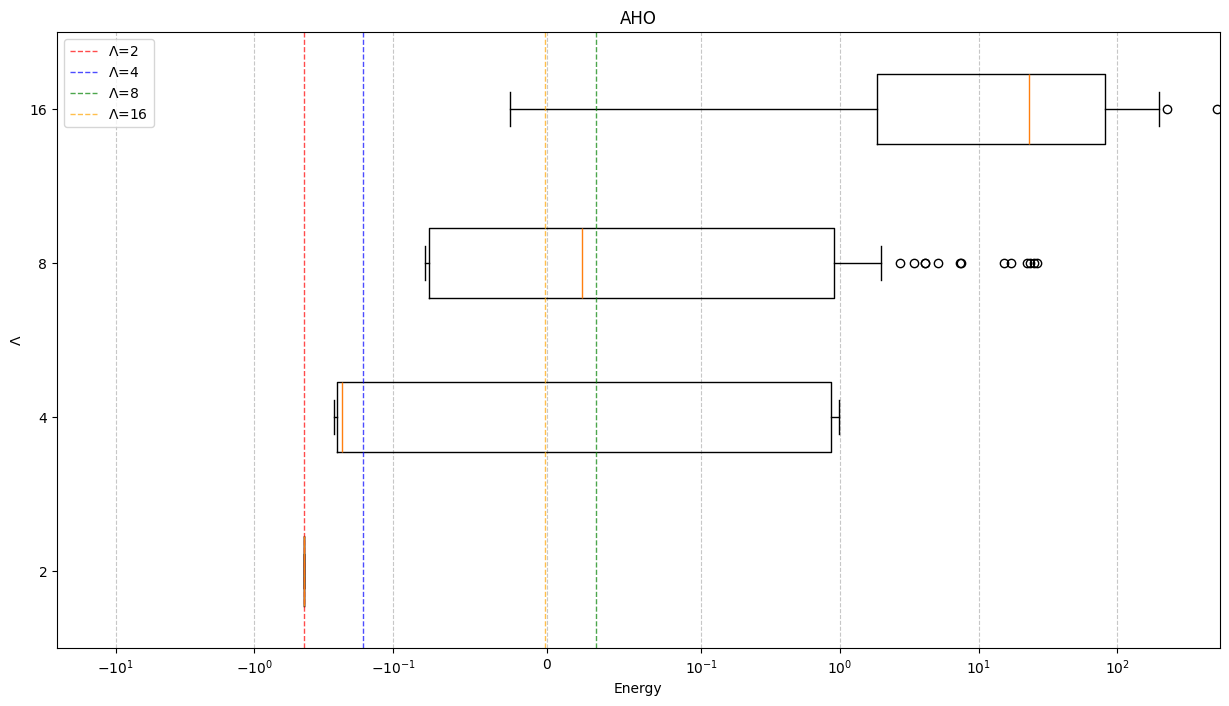

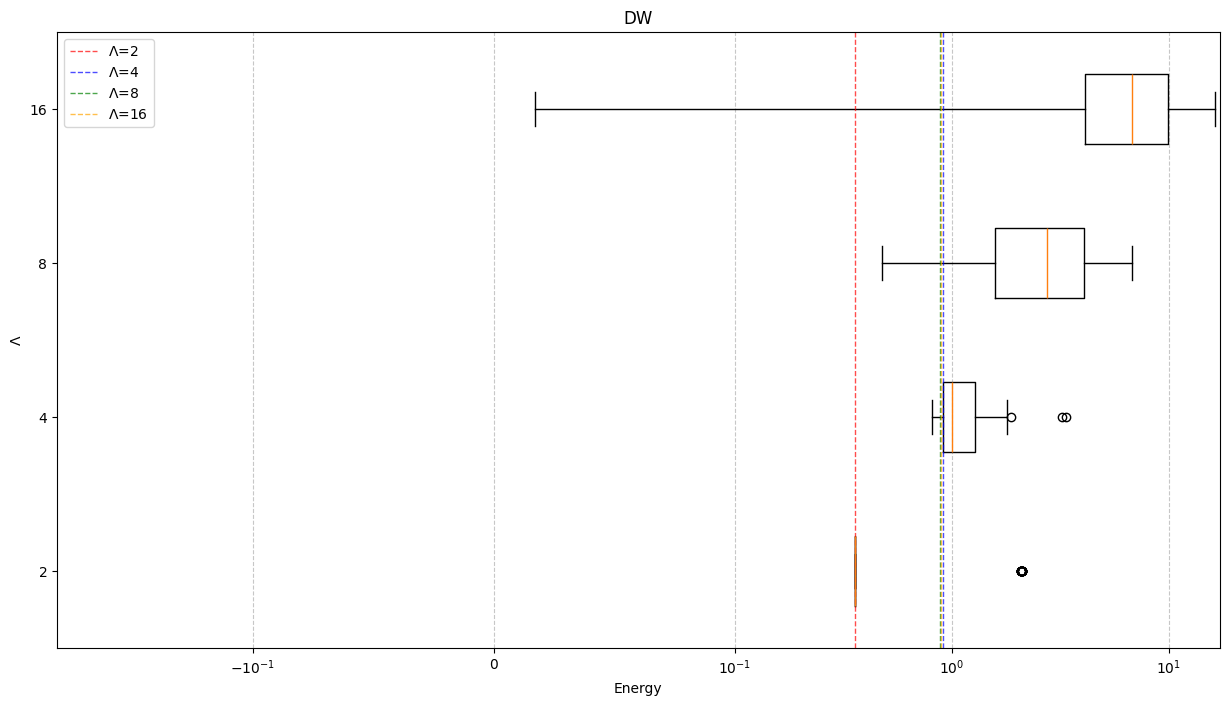

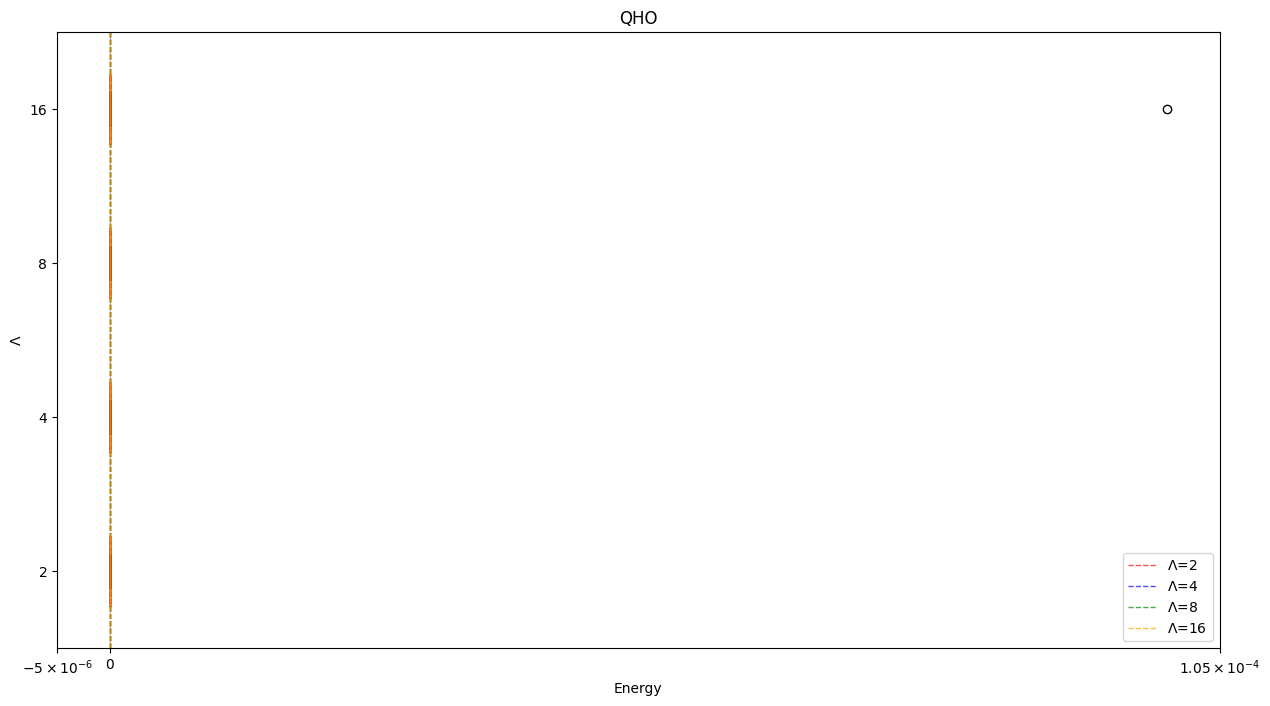

In [4]:
cutoff_list = [2,4,8,16]
colours = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
for potential in folders:
    all_data = []
    eigs = []
    for cutoff in cutoff_list:

        d_path = os.path.join(folder_path, potential, f'{potential}_{cutoff}.json')

        with open(d_path, 'r') as json_file:
            data = json.load(json_file)

        converged_indices = [i for i, success in enumerate(data['success']) if success]
        results = [data['results'][i] for i in converged_indices]
        results = data['results']

        all_data.append(results)
        eigs.append(data['exact_eigenvalues'][0])

    plt.figure(figsize=(15,8))
    plt.boxplot(all_data, vert=False, tick_labels=cutoff_list)

    for eig, c, colour in zip(eigs, cutoff_list, colours):
        plt.axvline(x=eig, color=colour, linestyle="--", linewidth=1.0, alpha=0.7, label=f"$\\Lambda$={c}")

    plt.title(f"{potential}")
    plt.xscale('symlog', linthresh=1e-1)
    plt.xlabel("Energy")
    plt.ylabel("$\\Lambda$")
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    save_path = os.path.join(folder_path, potential, "box_plot.png")
    plt.savefig(save_path)